<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from   sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-11 04:01:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-05-11 04:01:40 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df_tr = pd.read_csv('loan_train.csv')
df_tr.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
##df.to_csv(r'C:\Users\Dinma\Desktop\Loan_Train.csv', index=False)

In [5]:
df_tr.shape

(346, 10)

### Convert to date time object 

In [6]:
df_tr['due_date'] = pd.to_datetime(df_tr['due_date'])
df_tr['effective_date'] = pd.to_datetime(df_tr['effective_date'])
df_tr.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df_tr['Principal'].value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

In [8]:
df_tr['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

In [9]:
df_tr
df_tr['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [ ]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: / 

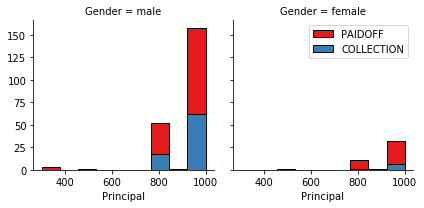

In [10]:
import seaborn as sns

bins = np.linspace(df_tr.Principal.min(), df_tr.Principal.max(), 10)
g = sns.FacetGrid(df_tr, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

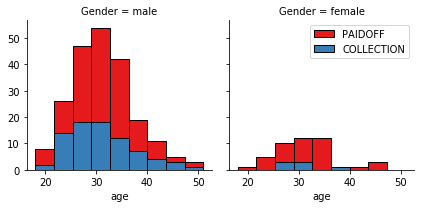

In [11]:
bins = np.linspace(df_tr.age.min(), df_tr.age.max(), 10)
g = sns.FacetGrid(df_tr, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction for loan_train dataset

### Lets look at the day of the week people get the loan 

In [12]:
df_tr['dayofweek'] = df_tr['effective_date'].dt.dayofweek
df_tr.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


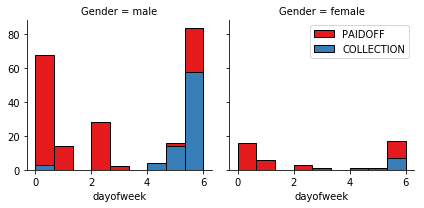

In [13]:
bins = np.linspace(df_tr.dayofweek.min(), df_tr.dayofweek.max(), 10)
g = sns.FacetGrid(df_tr, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [14]:
df_tr['weekend'] = df_tr['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_tr.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [15]:
df_tr.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [16]:
df_tr['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
df_tr.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [17]:
df_tr['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_tr.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [18]:
df_tr.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              1              0.750000
                      0              0.250000
High School or Below  1              0.741722
                      0              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               1              0.765101
                      0              0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [19]:
df_tr[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [20]:
Feature = df_tr[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df_tr['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [60]:
X_knn = Feature.copy()
X_knn[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [61]:
y_knn = df_tr['loan_status'].values.copy()
y_knn[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data 

Splitting the Loan_Train Data into Train and test Datasets to find the value of K with the  best accuracy

In [62]:
from sklearn.model_selection import train_test_split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split( X_knn, y_knn, test_size=0.25, random_state=3)
print ('Train set:', X_train_knn.shape,  y_train_knn.shape)
print ('Test set:', X_test_knn.shape,  y_test_knn.shape)

Train set: (259, 8) (259,)
Test set: (87, 8) (87,)


Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [25]:
X_knn= preprocessing.StandardScaler().fit(X_knn).transform(X_knn)
X_knn[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [26]:
##Import Library For KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

### Building the Model with Different Values of K to know the value of K with the highest accuracy (k = 1,2,3.....10)

In [27]:
from sklearn import metrics

Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_knn,y_train_knn)
    yhat_knn=neigh.predict(X_test_knn)
    mean_acc[n-1] = metrics.accuracy_score(y_test_knn, yhat_knn)

    std_acc[n-1]=np.std(yhat_knn==y_test_knn)/np.sqrt(yhat_knn.shape[0])

mean_acc

array([0.59770115, 0.54022989, 0.66666667, 0.65517241, 0.67816092,
       0.66666667, 0.70114943, 0.68965517, 0.71264368, 0.71264368])

### Plot Model Accuracy For Different Values Of K (Kneighbor)

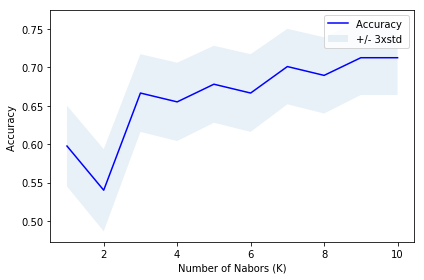

In [28]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [29]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7126436781609196 with k= 9


# Pre-processing:  Feature selection/extraction for loan_test dataset

In [30]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
test_df = pd.read_csv('loan_test.csv')
test_df.head()

--2020-05-11 04:03:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-05-11 04:03:22 (494 MB/s) - ‘loan_test.csv’ saved [3642/3642]



,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### We basically need to get this data into the the same shape as the loan_train dataset by massaging as we did on the loan_train dataset

In [31]:
test_df.shape

(54, 10)

In [32]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
##test_df.head()

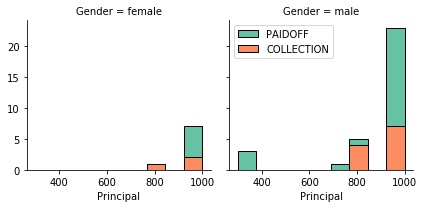

In [33]:
##Repayment Distribution by Principal
bins = np.linspace(test_df.Principal.min(), test_df.Principal.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

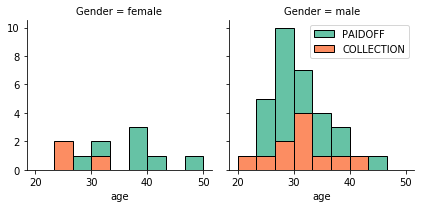

In [34]:
##Repayment Distribution by Age
bins = np.linspace(test_df.age.min(), test_df.age.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [35]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6


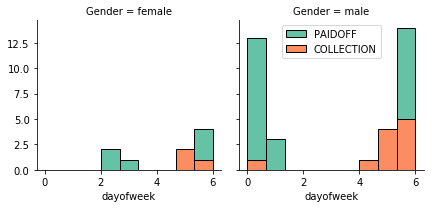

In [36]:
##Repayment Distribution by Day Of Week (Effective Date)
bins = np.linspace(test_df.dayofweek.min(), test_df.dayofweek.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [37]:
test_df['weekend'] = test_df['dayofweek'].apply( lambda x: 1 if(x>3) else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


### Convert Categorical features to Numerical 

In [38]:
## Loan_Status PAIDOFF = 1 while COLLECTION = 0
test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,1,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,1,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [39]:
## Gender female = 1 while male = 0
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,1,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,1,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [40]:
### Repayment Distribution By Gender (Percentage)
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
0       1              0.744186
        0              0.255814
1       1              0.727273
        0              0.272727
Name: loan_status, dtype: float64

In [41]:
### Repayment Distribution By Gender (Count)
test_df.groupby(['Gender'])['loan_status'].value_counts()

Gender  loan_status
0       1              32
        0              11
1       1               8
        0               3
Name: loan_status, dtype: int64

In [42]:
### Repayment Distribution By Gender (Percentage)
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              1              1.000000
High School or Below  1              0.523810
                      0              0.476190
Master or Above       1              1.000000
college               1              0.826087
                      0              0.173913
Name: loan_status, dtype: float64

In [43]:
### Repayment Distribution By Gender (Count)
test_df.groupby(['education'])['loan_status'].value_counts()

education             loan_status
Bechalor              1               8
High School or Below  1              11
                      0              10
Master or Above       1               2
college               1              19
                      0               4
Name: loan_status, dtype: int64

In [44]:
## Featutes We Need To Create The Model
test_df[['Principal','terms','age','Gender','weekend','education']].head()

,Principal,terms,age,Gender,weekend,education
0,1000,30,50,1,0,Bechalor
1,300,7,35,0,1,Master or Above
2,1000,30,43,1,1,High School or Below
3,1000,30,26,0,1,college
4,800,15,29,0,1,Bechalor


In [45]:
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [46]:
X_test_df = Feature_test.copy()
X_test_df[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [128]:
y_test_df = test_df['loan_status'].values.copy()
y_test_df[0:5]

array([1, 1, 1, 1, 1])

In [178]:
##from sklearn import metrics (This Has Already Been Imported Above)
print("Train set Accuracy: ", metrics.accuracy_score(y_train_knn, neigh_k9.predict(X_train_knn)))

Train set Accuracy:  0.7837837837837838


### Here, We Use The Loan_Test dataset To Test The Accuracy of our KNN Model Using the most accurate Value Of K (K = 9) As Derived  Above

In [129]:
## Training the model K = 4
k = 9
#Train Model and Predict  
neigh_k9 = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn,y_train_knn)
neigh_k9

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [130]:
### Using The Model Trained to predict on Loan_Test Dataset
yhat_knn_test_df = neigh_k9.predict(X_test_df)
yhat_knn_test_df[0:5]

array([1, 1, 1, 1, 1])

In [177]:
##from sklearn import metrics (This Has Already Been Imported Above)
print("Test set Accuracy: ", metrics.accuracy_score(y_test_df, yhat_knn_test_df))

Test set Accuracy:  0.7592592592592593


In [181]:
##Jaccard Index For Accuratcy
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test_df, yhat_knn_test_df)


0.7592592592592593

In [182]:
## Weighted Average
from sklearn.metrics import f1_score
f1_score(y_test_df, yhat_knn_test_df, average='weighted')

0.6717642373556352

In [183]:
## Log Loss
from sklearn.metrics import log_loss
log_loss(y_test_df, yhat_knn_test_df)

8.315083109267249

In [53]:
##from sklearn import metrics (This Has Already Been Imported Above)
##print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train),normalize=True))
##print("Test set Accuracy: ", metrics.accuracy_score(y_test_df, yhat_test_df,normalize=True))

The Accuracy Of the Model On the loan_Test dataset is  0.5185185185185185

# Decision Tree

### Import Decision Tree Classifier From SK_Learn

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## Bringing In The Data

In [64]:
X_dt = Feature.copy()
X_dt[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [66]:
y_dt = df_tr['loan_status'].values.copy()
y_dt[0:5]

array([1, 1, 1, 1, 1])

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [67]:
##from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=3)
print ('Train set:', X_train_dt.shape,  y_train_dt.shape)
print ('Test set:', X_test_dt.shape,  y_test_dt.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [69]:
X_dt= preprocessing.StandardScaler().fit(X_dt).transform(X_dt)
X_dt[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>loan_tree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [70]:
loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loan_tree ## This Shows The Default Parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Fit The Train and Test Data Into The Model

In [71]:
loan_tree.fit(X_train_dt,y_train_dt)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>pred_loan_tree</b>.
</div>

In [72]:
pred_loan_tree = loan_tree.predict(X_test_dt)
print(pred_loan_tree[0:10])
print(y_test_dt[0:10])

[1 1 1 1 1 1 0 0 1 0]
[1 1 0 0 1 0 1 0 1 1]


### Model Accuracy on train data

In [74]:
##from sklearn import metrics (Already Imported Above)
##import matplotlib.pyplot as plt (Already Imported Above)
print("DecisionTrees's Accuracy on train data: ", metrics.accuracy_score(y_test_dt, pred_loan_tree))

DecisionTrees's Accuracy on train data:  0.6538461538461539


### Find the accuracy of the model (Decision tree) on the test data

In [75]:
## Test Features
##X_test_df = Feature_test.copy()
##X_test_df[0:5]

In [76]:
##Test Label
##y_test_df = test_df['loan_status'].values.copy()
##y_test_df[0:5]

In [77]:
pred_loan_tree_on_test_data = loan_tree.predict(X_test_df)
print(pred_loan_tree_on_test_data[0:10])
print(y_test_df[0:10])

[1 1 0 1 1 0 0 1 1 1]
[1 1 1 1 1 1 1 1 1 1]


The Model's Accuracy on test data is shown below

In [135]:
print("DecisionTrees's Accuracy on test data: ", metrics.accuracy_score(y_test_df, pred_loan_tree_on_test_data))

DecisionTrees's Accuracy on test data:  0.7962962962962963


In [184]:
##Jaccard Index For Accuratcy
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test_df, pred_loan_tree_on_test_data)

0.7962962962962963

In [185]:
## Weighted Average
from sklearn.metrics import f1_score
f1_score(y_test_df, pred_loan_tree_on_test_data, average='weighted')

0.7985191651712822

In [186]:
## Log Loss
from sklearn.metrics import log_loss
log_loss(y_test_df, pred_loan_tree_on_test_data)

7.035750709836454

### Visualization

Lets Visualize the tree

In [79]:
# The below library(s) is necessary to visualize the Decision Tree
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

In [81]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [136]:
##dot_data = StringIO()
##filename = "drugtree.png"
##featureNames = df_tr.columns[0:8]
##targetNames = df_tr["loan_status"].unique().tolist()
##out=tree.export_graphviz(loan_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train_dt), filled=True,  special_characters=True,rotate=False)  
##graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
##graph.write_png(filename)
##img = mpimg.imread(filename)
##plt.figure(figsize=(100, 200))
##plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [86]:
## Other necessary libraries already imported above
import pylab as pl
import scipy.optimize as opt
%matplotlib inline 

In [91]:
Feature_svm_plot = pd.concat([Feature.copy(),df_tr['loan_status']], axis=1)
Feature_svm_plot.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college,loan_status
0,1000,30,45,0,0,0,1,0,1
1,1000,30,33,1,0,1,0,0,1
2,1000,15,27,0,0,0,0,1,1
3,1000,30,28,1,1,0,0,1,1
4,1000,30,29,0,1,0,0,1,1


In [87]:
X_svm = Feature.copy()
X_svm[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [88]:
y_svm = df_tr['loan_status'].values.copy()
y_svm[0:5]

array([1, 1, 1, 1, 1])

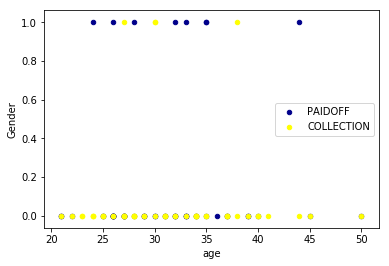

In [95]:
ax = Feature_svm_plot[Feature_svm_plot['loan_status'] == 1][0:50].plot(kind='scatter', x='age', y='Gender', color='DarkBlue', label='PAIDOFF');
Feature_svm_plot[Feature_svm_plot['loan_status'] == 0][0:50].plot(kind='scatter', x='age', y='Gender', color='Yellow', label='COLLECTION', ax=ax);
plt.show()

In [97]:
X_svm.dtypes

Principal               int64
terms                   int64
age                     int64
Gender                  int64
weekend                 int64
Bechalor                uint8
High School or Below    uint8
college                 uint8
dtype: object

In [98]:
##Train test test split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split( X_svm, y_svm, test_size=0.2, random_state=4)
print ('Train set:', X_train_svm.shape,  y_train_svm.shape)
print ('Test set:', X_test_svm.shape,  y_test_svm.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [104]:
X_svm= preprocessing.StandardScaler().fit(X_svm).transform(X_svm)
X_svm[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [105]:
## Import the svm algorithm and instantiate the model and Fit the model
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_svm, y_train_svm) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [106]:
## Use the model to predict on the train set
yhat_svm = clf.predict(X_test_svm)
yhat_svm [0:5]

array([1, 1, 1, 0, 1])

In [138]:
## Model Accuracy on ttrain data
print("Support vector Machine's Accuracy on train data: ", metrics.accuracy_score(y_test_svm, yhat_svm))

Support vector Machine's Accuracy on train data:  0.7571428571428571


### Evaluation of the metric on train data

In [108]:
## Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [109]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.25      0.07      0.11        15
           1       0.79      0.95      0.86        55

   micro avg       0.76      0.76      0.76        70
   macro avg       0.52      0.51      0.48        70
weighted avg       0.67      0.76      0.70        70

Confusion matrix, without normalization
[[ 1 14]
 [ 3 52]]


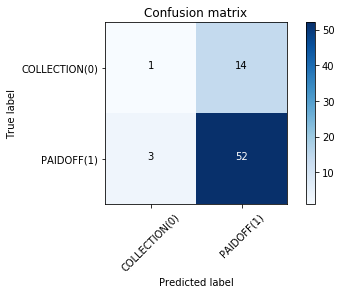

In [111]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_svm, yhat_svm, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test_svm, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION(0)','PAIDOFF(1)'],normalize= False,  title='Confusion matrix')

In [164]:
## Weighted Average
##from sklearn.metrics import f1_score
##f1_score(y_test_svm, yhat_svm, average='weighted') 

In [165]:
##Jaccard Index For Accuratcy
##from sklearn.metrics import jaccard_similarity_score
##jaccard_similarity_score(y_test_svm, yhat_svm)

In [166]:
## Log Loss
##from sklearn.metrics import log_loss
##log_loss(y_test_svm, yhat_svm)

### Use the svm model to predict on test data

In [115]:
## Test Features
    ##X_test_df = Feature_test.copy()
    ##X_test_df[0:5]
    ##Test Label
    ##y_test_df = test_df['loan_status'].values.copy()
    ##y_test_df[0:5]

In [116]:
## Use the model to predict on the test set
yhat_svm_test_df = clf.predict(X_test_df)
yhat_svm_test_df [0:5]

array([1, 1, 1, 1, 1])

In [139]:
## Model Accuracy on test data
print("Support vector Machine's Accuracy on train data: ", metrics.accuracy_score(y_test_df, yhat_svm_test_df))

Support vector Machine's Accuracy on train data:  0.7592592592592593


## confusion matrix on test set

In [118]:
## confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.75      1.00      0.86        40

   micro avg       0.76      0.76      0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54

Confusion matrix, without normalization
[[ 1 13]
 [ 0 40]]


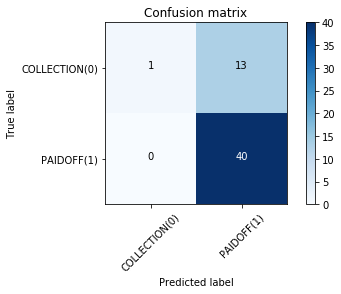

In [121]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_df, yhat_svm_test_df, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test_df, yhat_svm_test_df))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION(0)','PAIDOFF(1)'],normalize= False,  title='Confusion matrix')

In [187]:
##Jaccard Index For Accuratcy
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test_df, yhat_svm_test_df)

0.7592592592592593

In [188]:
## Weighted Average
from sklearn.metrics import f1_score
f1_score(y_test_df, yhat_svm_test_df, average='weighted')

0.6717642373556352

In [189]:
## Log Loss
from sklearn.metrics import log_loss
log_loss(y_test_df, yhat_svm_test_df)

8.315083109267249

# Logistic Regression

In [ ]:
        ## ALL LIBRARIES ALREADY IMPORTED ABOVE
##import pandas as pd
##import pylab as pl
##import numpy as np
##import scipy.optimize as opt
##from sklearn import preprocessing
##%matplotlib inline 
##import matplotlib.pyplot as plt

### Bring in the already prapared train data

In [140]:
X_lr = Feature.copy()
X_lr[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [141]:
y_lr = df_tr['loan_status'].values.copy()
y_lr[0:5]

array([1, 1, 1, 1, 1])

### Bring in the already prapared test data

In [ ]:
## Test Features
    ##X_test_df = Feature_test.copy()
    ##X_test_df[0:5]
    ##Test Label
    ##y_test_df = test_df['loan_status'].values.copy()
    ##y_test_df[0:5]

In [142]:
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split( X_lr, y_lr, test_size=0.25, random_state=4)
print ('Train set:', X_train_lr.shape,  y_train_lr.shape)
print ('Test set:', X_test_lr.shape,  y_test_lr.shape)

Train set: (259, 8) (259,)
Test set: (87, 8) (87,)


In [144]:
## Transform the test data into standard scalar
X_lr = preprocessing.StandardScaler().fit(X_lr).transform(X_lr)
X_lr[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

### Model the data

In [147]:
## Library already imported
from sklearn.linear_model import LogisticRegression
    ##from sklearn.metrics import confusion_matrix
loan_lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_lr,y_train_lr)
loan_lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Use the model to predict on train_data

In [149]:
yhat_lr = loan_lr.predict(X_test_lr)
yhat_lr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [155]:
##from sklearn import metrics (This Has Already Been Imported Above)
print("Logistic Regression's Accuracy on train data: ", metrics.accuracy_score(y_test_lr, yhat_lr))

Logistic Regression's Accuracy on train data:  0.735632183908046


__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):  __TRAIN DATA__

In [153]:
## PROBABLITITY
yhat_lr_prob = loan_lr.predict_proba(X_test_lr)
yhat_lr_prob[0:5] ## TO SHOW THE FIRST FEW ROWS

array([[0.3 , 0.7 ],
       [0.24, 0.76],
       [0.17, 0.83],
       [0.3 , 0.7 ],
       [0.23, 0.77]])

### Use the model to predict the test dataset

In [156]:
yhat_lr_test_df = loan_lr.predict(X_test_df)
yhat_lr_test_df

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [157]:
##from sklearn import metrics (This Has Already Been Imported Above)
print("Logistic Regression's Accuracy on test data: ", metrics.accuracy_score(y_test_df, yhat_lr_test_df))

Logistic Regression's Accuracy on test data:  0.7407407407407407


__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):  __TEST DATA__

In [158]:
## PROBABLITITY
yhat_lr_test_df_prob = loan_lr.predict_proba(X_test_df)
yhat_lr_test_df_prob[0:5] ## TO SHOW THE FIRST FEW ROWS

array([[0.14, 0.86],
       [0.24, 0.76],
       [0.2 , 0.8 ],
       [0.33, 0.67],
       [0.25, 0.75]])

In [190]:
##Jaccard Index For Accuratcy
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test_df, yhat_lr_test_df)

0.7407407407407407

In [191]:
## Weighted Average
from sklearn.metrics import f1_score
f1_score(y_test_df, yhat_lr_test_df, average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6304176516942475

In [192]:
## Log Loss
from sklearn.metrics import log_loss
log_loss(y_test_df, yhat_lr_test_df)

8.95470488690319

# Model Evaluation using Test set

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [ ]:
##This Cell has been moved further up
##!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
##test_df = pd.read_csv('loan_test.csv')
##test_df.head()

### Load Test set for evaluation 

In [170]:
## THE TEST SET HAS BEEN LOADED AND MASSAGED/PREPROSESSED ABOVE

# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [197]:
###TEST DATAFRAME
data = [['KNN',0.7592592592592593, 0.6717642373556352,8.315083109267249],
        ['Decision Tree',0.7962962962962963,0.7985191651712822,7.035750709836454],
        ['SVM',0.7592592592592593,0.6717642373556352,8.315083109267249],
        ['LogisticRegression', 0.7407407407407407,0.6304176516942475, 8.95470488690319]]
df = pd.DataFrame(data,columns=['Algorithm','Jaccard','F1-score','LogLoss'],dtype=float)
print (df)

            Algorithm   Jaccard  F1-score   LogLoss
0                 KNN  0.759259  0.671764  8.315083
1       Decision Tree  0.796296  0.798519  7.035751
2                 SVM  0.759259  0.671764  8.315083
3  LogisticRegression  0.740741  0.630418  8.954705


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>